In [1]:
import pandas as pd
import numpy as np

In [2]:
path='clean_df.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [3]:
# we will study make vs price
df_mp = df[['make', 'price']]
df_mp = df_mp.groupby(['make'], as_index=False).mean()
df_mp.sort_values('price', inplace=True)
df_mp

,make,price
3,chevrolet,6007.000000
4,dodge,7875.444444
14,plymouth,7963.428571
5,honda,8184.692308
18,subaru,8541.250000
6,isuzu,8916.500000
11,mitsubishi,9239.769231
16,renault,9595.000000
19,toyota,9885.812500
20,volkswagen,10077.500000


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='make', ylabel='price'>

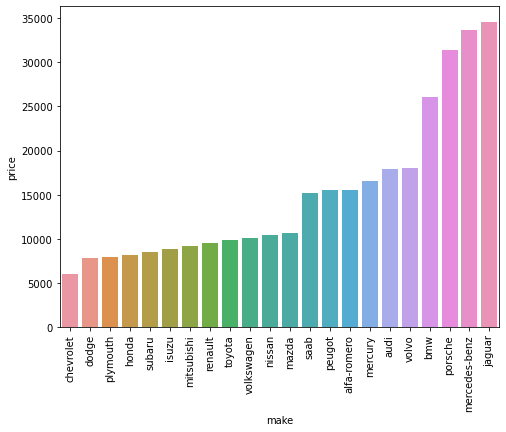

In [5]:
plt.figure(figsize=(20/2.54, 15/2.54))
plt.xticks(rotation=90)
sns.barplot(x='make', y='price', data=df_mp)

In [6]:
from scipy import stats

In [7]:
df_mp = df[['make', 'price']]
df_mp = df_mp.groupby(['make'])

target_make = 'honda'
for make in ['subaru', 'jaguar']:
    print(f"{target_make} vs {make}")
    res = stats.f_oneway(df_mp.get_group(target_make)["price"], 
                         df_mp.get_group(make)["price"])
    print(f"F-Value is {res.statistic}")
    print(f"P-Value is {res.pvalue}")
    print()

honda vs subaru
F-Value is 0.19744030127462606
P-Value is 0.6609478240622193

honda vs jaguar
F-Value is 400.925870564337
P-Value is 1.0586193512077862e-11



(0.0, 53432.02543262341)

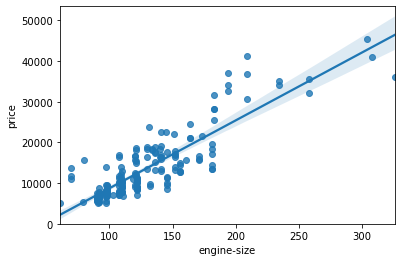

In [11]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0)

In [12]:
df["highway-mpg"] = 235 / df["highway-L/100km"]

(0.0, 48172.71320793203)

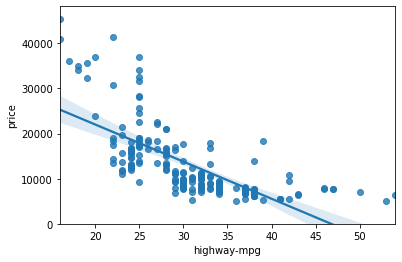

In [13]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0)

(0.0, 47414.1)

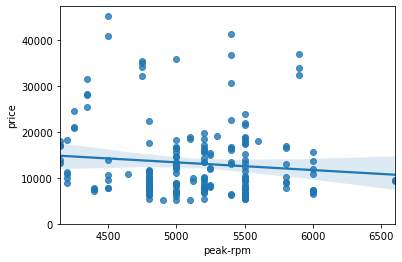

In [14]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0)

In [16]:
pearson_coef, pvalue = stats.pearsonr(df['horsepower'], df['price'])
print(f"Pearson coefficient: {pearson_coef}")
print(f"P-Value: {pvalue}")

Pearson coefficient: 0.809574567003656
P-Value: 6.369057428259557e-48


<AxesSubplot:>

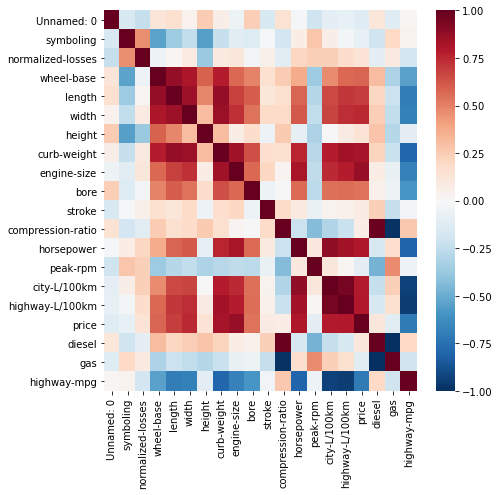

In [27]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), cmap="RdBu_r")